# Stage 4 - Anne Nguyen

For my linear and polynomial regressions, I chose to analyze New York.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
deaths = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
hospital = pd.read_csv('../../../../data/stage_1/Weekly_Hospital_Capacity.csv')
social = pd.read_csv('../../../../data/stage_1/social.csv')
economic = pd.read_csv('../../../../data/stage_1/economic.csv')
housing = pd.read_csv('../../../../data/stage_1/housing.csv')

cases = cases.drop(cases.index[cases['countyFIPS'] == 0])
deaths = deaths.drop(deaths.index[deaths['countyFIPS'] == 0])
hospital = hospital.drop(hospital.index[hospital['fips_code'] == 0])

## New York

Finding the first day of infections

In [3]:
ny_cases = cases.loc[cases['State'] == 'NY']
ny_cases = ny_cases.drop(ny_cases.columns[:4], axis=1)
ny_cases.sum().head(42)

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
2020-01-29    0
2020-01-30    0
2020-01-31    0
2020-02-01    0
2020-02-02    0
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
2020-02-08    0
2020-02-09    0
2020-02-10    0
2020-02-11    0
2020-02-12    0
2020-02-13    0
2020-02-14    0
2020-02-15    0
2020-02-16    0
2020-02-17    0
2020-02-18    0
2020-02-19    0
2020-02-20    0
2020-02-21    0
2020-02-22    0
2020-02-23    0
2020-02-24    0
2020-02-25    0
2020-02-26    0
2020-02-27    0
2020-02-28    0
2020-02-29    0
2020-03-01    0
2020-03-02    1
2020-03-03    2
dtype: int64

In [4]:
ny_cases = ny_cases.iloc[:, 40:]
ny_cases.head()

,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,25297,25410,25468,25510,25565,25607,25670,25670,25808,25847
1862,0,0,0,0,0,0,0,0,0,0,...,3592,3597,3598,3605,3611,3618,3620,3620,3622,3627
1863,0,0,0,0,0,0,1,2,3,3,...,181361,181874,182153,182378,182636,183027,183354,183354,183992,184196
1864,0,0,0,0,0,0,0,0,0,0,...,18929,18994,19020,19047,19074,19116,19180,19180,19254,19285
1865,0,0,0,0,0,0,0,0,0,0,...,5816,5834,5836,5840,5852,5863,5874,5874,5893,5897


In [5]:
ny_deaths = deaths.loc[deaths['State'] == 'NY']
ny_deaths = ny_deaths.drop(ny_deaths.columns[:4], axis=1)
ny_deaths = ny_deaths.iloc[:, 40:]
ny_deaths.head()

,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,358,358
1862,0,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
1863,0,0,0,0,0,0,0,0,0,0,...,6589,6589,6592,6592,6596,6596,6597,6597,6597,6599
1864,0,0,0,0,0,0,0,0,0,0,...,367,367,367,367,368,368,369,369,369,369
1865,0,0,0,0,0,0,0,0,0,0,...,93,93,93,93,93,93,94,94,94,94


Calculating the new daily cases and deaths (code from stage 2)

In [6]:
ny_new_cases = pd.DataFrame()
for column in range(1, 533):
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]
display(ny_new_cases.head())

ny_new_deaths = pd.DataFrame()
for column in range(1, 533):
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]
display(ny_new_deaths.head())

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_893/3270698245.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,523,524,525,526,527,528,529,530,531,532
1861,0,0,0,0,0,0,0,0,0,1,...,0,113,58,42,55,42,63,0,138,39
1862,0,0,0,0,0,0,0,0,0,0,...,0,5,1,7,6,7,2,0,2,5
1863,0,0,0,0,0,1,1,1,0,7,...,0,513,279,225,258,391,327,0,638,204
1864,0,0,0,0,0,0,0,0,0,1,...,0,65,26,27,27,42,64,0,74,31
1865,0,0,0,0,0,0,0,0,0,0,...,0,18,2,4,12,11,11,0,19,4


/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_893/3270698245.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,523,524,525,526,527,528,529,530,531,532
1861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,1,0,0,2
1864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Adding up the county data to represent the state

In [7]:
ny_state_cases = pd.DataFrame(ny_new_cases.sum())
ny_state_cases = ny_state_cases.rename(columns={0: 'cases'})
ny_state_cases.head()

,cases
1,1
2,9
3,12
4,2
5,52


In [8]:
ny_state_deaths = pd.DataFrame(ny_new_deaths.sum())
ny_state_deaths = ny_state_deaths.rename(columns={0: 'deaths'})
ny_state_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

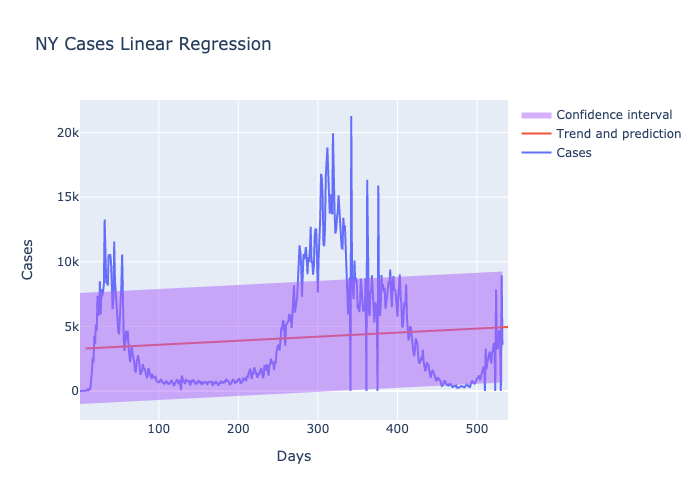

In [9]:
lm = smf.ols(formula='ny_state_cases.cases ~ ny_state_cases.index', data=ny_state_cases).fit()
x = pd.DataFrame({'index': np.linspace(ny_state_cases['cases'].min(), ny_state_cases['cases'].max(), 532)})

fig = go.Figure([go.Scatter(name='Cases', x=ny_state_cases.index, y=ny_state_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=ny_state_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=ny_state_cases.index, y=lm.predict(x)+int(ny_state_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=ny_state_cases.index, 
                            y=lm.predict(x)-int(ny_state_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='NY Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 4,949.

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ny_state_cases.cases   R-squared:                       0.013
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     6.731
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):            0.00974
Time:                          09:47:15   Log-Likelihood:                -5201.3
No. Observations:                   532   AIC:                         1.041e+04
Df Residuals:                       530   BIC:                         1.042e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3287.1034    370.935      8.862      0.000    2558.420    4015.787
ny_state_cases.index     3.1288      1.206      2.594      0.010       0.760       5.498
==============================================================================
Omnibus:                       95.323   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.610
Skew:                           1.204   Prob(JB):                     3.97e-32
Kurtosis:                       3.849   Cond. No.                         616.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

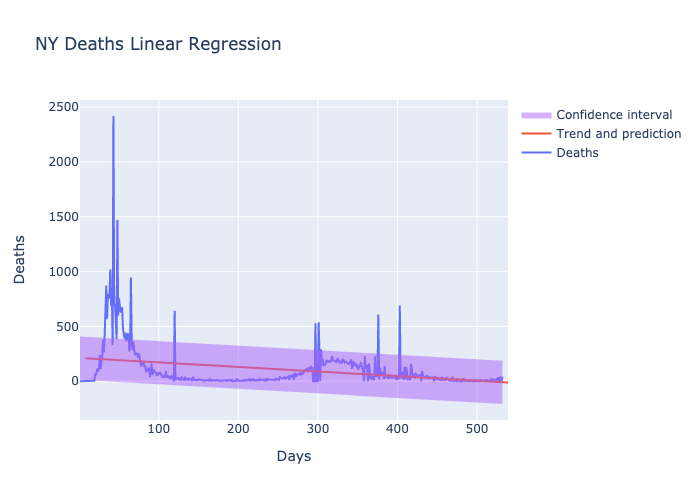

In [11]:
lm = smf.ols(formula='ny_state_deaths.deaths ~ ny_state_deaths.index', data=ny_state_deaths).fit()
x = pd.DataFrame({'index': np.linspace(ny_state_deaths['deaths'].min(), ny_state_deaths['deaths'].max(), 532)})

fig = go.Figure([go.Scatter(name='Deaths', x=ny_state_deaths.index, y=ny_state_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=ny_state_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=ny_state_deaths.index, y=lm.predict(x)+int(ny_state_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=ny_state_deaths.index, 
                            y=lm.predict(x)-int(ny_state_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='NY Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach 0.

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ny_state_deaths.deaths   R-squared:                       0.105
Model:                                OLS   Adj. R-squared:                  0.103
Method:                     Least Squares   F-statistic:                     62.16
Date:                    Wed, 13 Apr 2022   Prob (F-statistic):           1.82e-14
Time:                            09:47:15   Log-Likelihood:                -3537.0
No. Observations:                     532   AIC:                             7078.
Df Residuals:                         530   BIC:                             7087.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               211.3454     16.244     13.011      0.000     179.435     243.256
ny_state_deaths.index    -0.4164      0.053     -7.884      0.000      -0.520      -0.313
==============================================================================
Omnibus:                      579.736   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43420.102
Skew:                           4.902   Prob(JB):                         0.00
Kurtosis:                      46.159   Cond. No.                         616.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

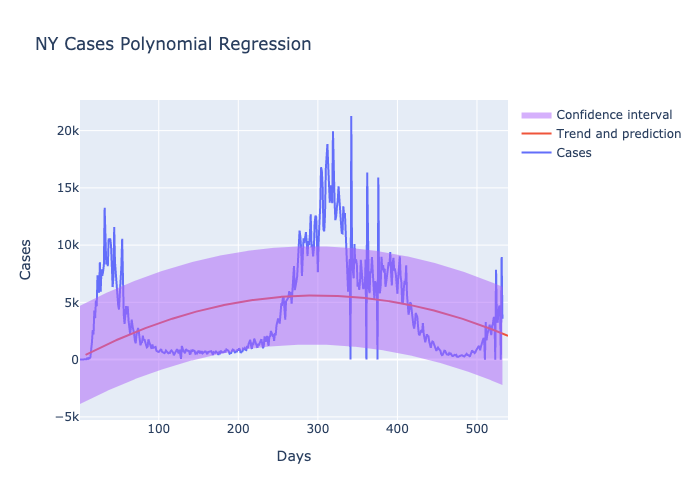

In [13]:
poly_2 = smf.ols(formula='ny_state_cases.cases ~ 1 + ny_state_cases.index + I(ny_state_cases.index ** 2.0)', 
                 data=ny_state_cases).fit()
x = pd.DataFrame({'index': np.linspace(ny_state_cases['cases'].min(), ny_state_cases['cases'].max(), 532)})

fig = go.Figure([go.Scatter(name='Cases', x=ny_state_cases.index, y=ny_state_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=ny_state_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=ny_state_cases.index, y=poly_2.predict(x)+int(ny_state_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=ny_state_cases.index, 
                            y=poly_2.predict(x)-int(ny_state_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='NY Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 2,109.

In [14]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ny_state_cases.cases   R-squared:                       0.103
Model:                              OLS   Adj. R-squared:                  0.100
Method:                   Least Squares   F-statistic:                     30.42
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           3.12e-13
Time:                          09:47:16   Log-Likelihood:                -5175.7
No. Observations:                   532   AIC:                         1.036e+04
Df Residuals:                       529   BIC:                         1.037e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        382.6427    532.011      0.719      0.472    -662.471    1427.757
ny_state_cases.index              35.7632      4.610      7.758      0.000      26.708      44.819
I(ny_state_cases.index ** 2.0)    -0.0612      0.008     -7.311      0.000      -0.078      -0.045
==============================================================================
Omnibus:                       76.793   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.146
Skew:                           1.065   Prob(JB):                     5.41e-24
Kurtosis:                       3.542   Cond. No.                     3.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

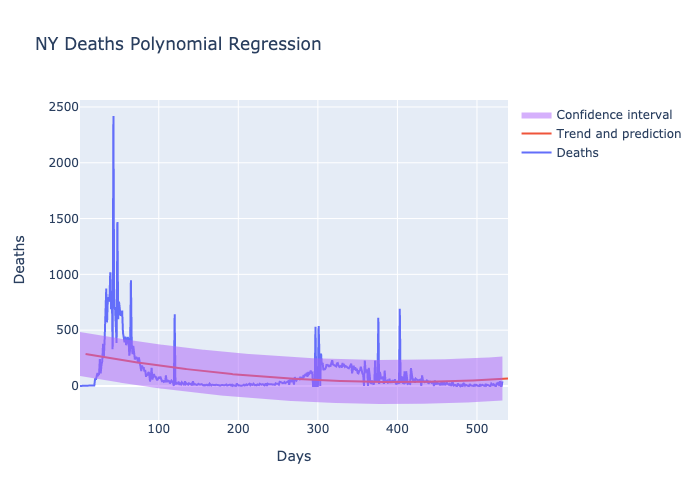

In [15]:
poly_2 = smf.ols(formula='ny_state_deaths.deaths ~ 1 + ny_state_deaths.index + I(ny_state_deaths.index ** 2.0)', 
                 data=ny_state_deaths).fit()
x = pd.DataFrame({'index': np.linspace(ny_state_deaths['deaths'].min(), ny_state_deaths['deaths'].max(), 532)})

fig = go.Figure([go.Scatter(name='Deaths', x=ny_state_deaths.index, y=ny_state_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=ny_state_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=ny_state_deaths.index, y=poly_2.predict(x)+int(ny_state_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=ny_state_deaths.index, 
                            y=poly_2.predict(x)-int(ny_state_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='NY Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 66.

poly_2.summary()

Finding the top 5 counties with the highest number of cases

In [16]:
ny_new_cases.sum(axis=1).sort_values(ascending=False).head()

1884    292211
1901    284764
1912    209612
1890    192601
1863    184196
dtype: int64

In [17]:
ny_cases = cases.loc[cases['State'] == 'NY']
print(ny_cases.loc[1884, 'County Name'])
print(ny_cases.loc[1901, 'County Name'])
print(ny_cases.loc[1912, 'County Name'])
print(ny_cases.loc[1890, 'County Name'])
print(ny_cases.loc[1863, 'County Name'])

Kings County 
Queens County 
Suffolk County 
Nassau County 
Bronx County 


## Kings County

In [18]:
kings_cases = ny_new_cases.loc[1884]
kings_cases.head()

1    0
2    0
3    1
4    0
5    2
Name: 1884, dtype: int64

In [19]:
kings_cases = pd.DataFrame(kings_cases.iloc[2:])
kings_cases = kings_cases.rename(columns={1884: 'cases'})
kings_cases.index -= 2
kings_cases.head()

,cases
1,1
2,0
3,2
4,0
5,1


In [20]:
kings_deaths = ny_new_deaths.loc[1884]
kings_deaths = pd.DataFrame(kings_deaths.iloc[2:])
kings_deaths = kings_deaths.rename(columns={1884: 'deaths'})
kings_deaths.index -= 2
kings_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

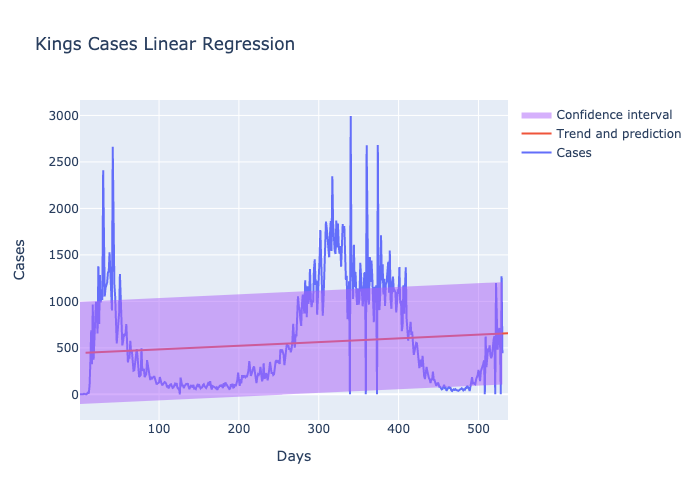

In [21]:
lm = smf.ols(formula='kings_cases.cases ~ kings_cases.index', data=kings_cases).fit()
x = pd.DataFrame({'index': np.linspace(kings_cases['cases'].min(), kings_cases['cases'].max(), 530)})

fig = go.Figure([go.Scatter(name='Cases', x=kings_cases.index, y=kings_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=kings_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=kings_cases.index, y=lm.predict(x)+int(kings_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=kings_cases.index, 
                            y=lm.predict(x)-int(kings_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Kings Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 656.

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      kings_cases.cases   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.546
Date:                Wed, 13 Apr 2022   Prob (F-statistic):             0.0108
Time:                        09:47:16   Log-Likelihood:                -4093.1
No. Observations:                 530   AIC:                             8190.
Df Residuals:                     528   BIC:                             8199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           445.7155     47.649      9.354      0.000     352.111     539.320
kings_cases.index     0.3978      0.155      2.558      0.011       0.092       0.703
==============================================================================
Omnibus:                      100.525   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.197
Skew:                           1.199   Prob(JB):                     1.64e-35
Kurtosis:                       4.225   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

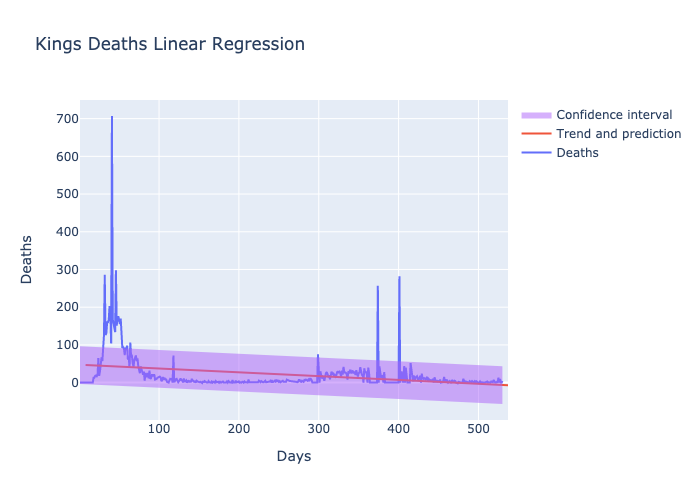

In [23]:
lm = smf.ols(formula='kings_deaths.deaths ~ kings_deaths.index', data=kings_deaths).fit()
x = pd.DataFrame({'index': np.linspace(kings_deaths['deaths'].min(), kings_deaths['deaths'].max(), 530)})

fig = go.Figure([go.Scatter(name='Deaths', x=kings_deaths.index, y=kings_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=kings_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=kings_deaths.index, y=lm.predict(x)+int(kings_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=kings_deaths.index, 
                            y=lm.predict(x)-int(kings_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Kings Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction shows that the number of deaths will reach 0.

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     kings_deaths.deaths   R-squared:                       0.095
Model:                             OLS   Adj. R-squared:                  0.093
Method:                  Least Squares   F-statistic:                     55.27
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):           4.26e-13
Time:                         09:47:17   Log-Likelihood:                -2798.8
No. Observations:                  530   AIC:                             5602.
Df Residuals:                      528   BIC:                             5610.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.5991      4.145     11.243      0.000      38.457      54.741
kings_deaths.index    -0.1006      0.014     -7.435      0.000      -0.127      -0.074
==============================================================================
Omnibus:                      718.892   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134831.746
Skew:                           6.847   Prob(JB):                         0.00
Kurtosis:                      79.929   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

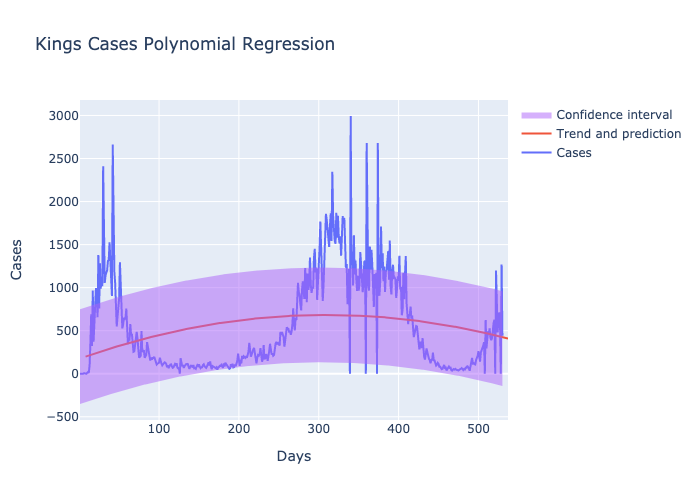

In [25]:
poly_2 = smf.ols(formula='kings_cases.cases ~ 1 + kings_cases.index + I(kings_cases.index ** 2.0)', 
                 data=kings_cases).fit()
x = pd.DataFrame({'index': np.linspace(kings_cases['cases'].min(), kings_cases['cases'].max(), 530)})

fig = go.Figure([go.Scatter(name='Cases', x=kings_cases.index, y=kings_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=kings_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=kings_cases.index, y=poly_2.predict(x)+int(kings_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=kings_cases.index, 
                            y=poly_2.predict(x)-int(kings_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Kings Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 411.

In [26]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      kings_cases.cases   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     14.84
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.35e-07
Time:                        09:47:17   Log-Likelihood:                -4081.8
No. Observations:                 530   AIC:                             8170.
Df Residuals:                     527   BIC:                             8182.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     194.9928     70.203      2.778      0.006      57.080     332.905
kings_cases.index               3.2255      0.611      5.283      0.000       2.026       4.425
I(kings_cases.index ** 2.0)    -0.0053      0.001     -4.783      0.000      -0.008      -0.003
==============================================================================
Omnibus:                      103.657   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.759
Skew:                           1.203   Prob(JB):                     8.32e-38
Kurtosis:                       4.393   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

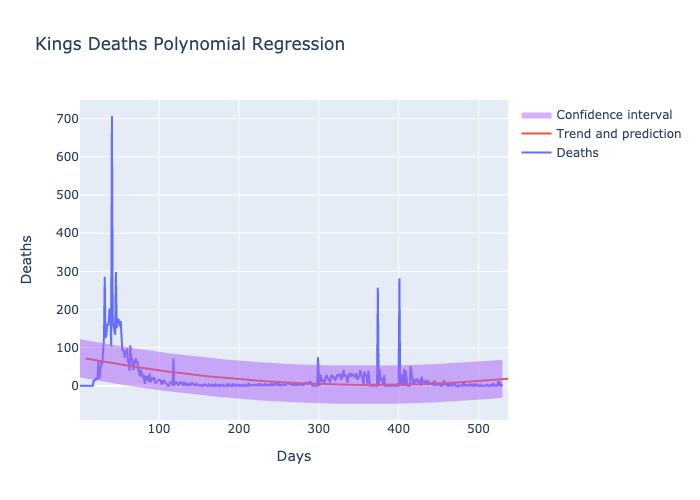

In [27]:
poly_2 = smf.ols(formula='kings_deaths.deaths ~ 1 + kings_deaths.index + I(kings_deaths.index ** 2.0)', 
                 data=kings_deaths).fit()
x = pd.DataFrame({'index': np.linspace(kings_deaths['deaths'].min(), kings_deaths['deaths'].max(), 530)})

fig = go.Figure([go.Scatter(name='Deaths', x=kings_deaths.index, y=kings_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=kings_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=kings_deaths.index, y=poly_2.predict(x)+int(kings_deaths.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=kings_deaths.index, 
                            y=poly_2.predict(x)-int(kings_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Kings Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 19.

In [28]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     kings_deaths.deaths   R-squared:                       0.147
Model:                             OLS   Adj. R-squared:                  0.144
Method:                  Least Squares   F-statistic:                     45.47
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):           6.08e-19
Time:                         09:47:17   Log-Likelihood:                -2783.0
No. Observations:                  530   AIC:                             5572.
Df Residuals:                      527   BIC:                             5585.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       72.3258      6.055     11.946      0.000      60.432      84.220
kings_deaths.index              -0.3907      0.053     -7.420      0.000      -0.494      -0.287
I(kings_deaths.index ** 2.0)     0.0005    9.6e-05      5.690      0.000       0.000       0.001
==============================================================================
Omnibus:                      717.781   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142345.322
Skew:                           6.797   Prob(JB):                         0.00
Kurtosis:                      82.127   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Queens County

In [29]:
queens_cases = ny_new_cases.loc[1901]
queens_cases.head()

1    0
2    0
3    0
4    0
5    1
Name: 1901, dtype: int64

In [30]:
queens_cases = pd.DataFrame(queens_cases.iloc[4:])
queens_cases = queens_cases.rename(columns={1901: 'cases'})
queens_cases.index -= 4
queens_cases.head()

,cases
1,1
2,0
3,1
4,2
5,0


In [31]:
queens_deaths = ny_new_deaths.loc[1901]
queens_deaths = pd.DataFrame(queens_deaths.iloc[4:])
queens_deaths = queens_deaths.rename(columns={1901: 'deaths'})
queens_deaths.index -= 4
queens_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

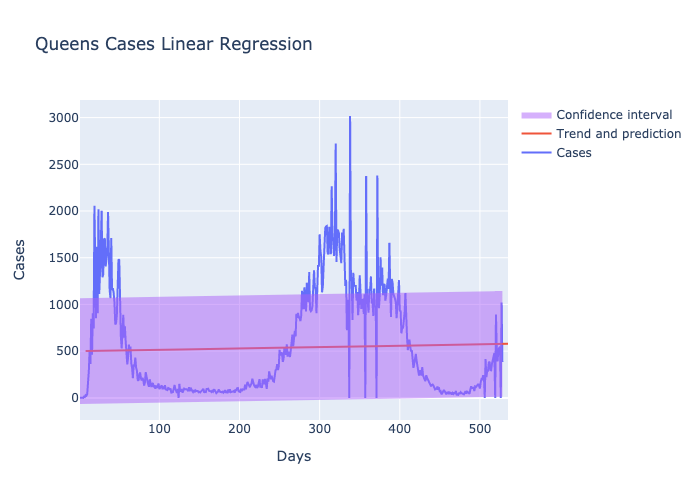

In [32]:
lm = smf.ols(formula='queens_cases.cases ~ queens_cases.index', data=queens_cases).fit()
x = pd.DataFrame({'index': np.linspace(queens_cases['cases'].min(), queens_cases['cases'].max(), 528)})

fig = go.Figure([go.Scatter(name='Cases', x=queens_cases.index, y=queens_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=queens_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=queens_cases.index, y=lm.predict(x)+int(queens_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=queens_cases.index, 
                            y=lm.predict(x)-int(queens_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Queens Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 578.

In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     queens_cases.cases   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8281
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.363
Time:                        09:47:17   Log-Likelihood:                -4095.4
No. Observations:                 528   AIC:                             8195.
Df Residuals:                     526   BIC:                             8203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            500.3956     49.374     10.135      0.000     403.401     597.390
queens_cases.index     0.1472      0.162      0.910      0.363      -0.171       0.465
==============================================================================
Omnibus:                       87.721   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.782
Skew:                           1.158   Prob(JB):                     1.08e-28
Kurtosis:                       3.702   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

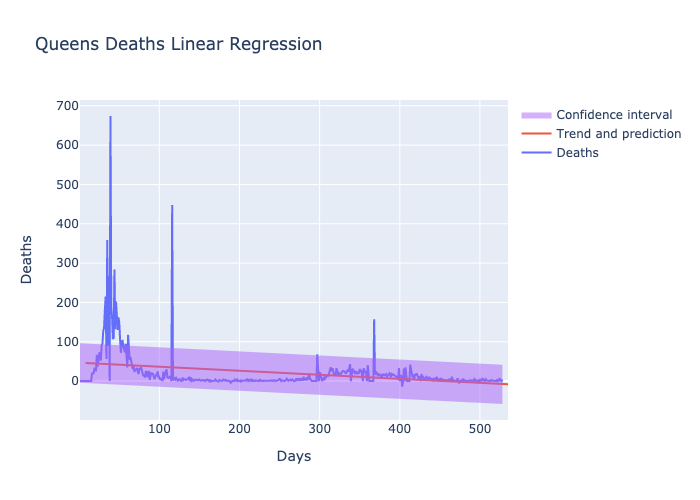

In [34]:
lm = smf.ols(formula='queens_deaths.deaths ~ queens_deaths.index', data=queens_deaths).fit()
x = pd.DataFrame({'index': np.linspace(queens_deaths['deaths'].min(), queens_deaths['deaths'].max(), 528)})

fig = go.Figure([go.Scatter(name='Deaths', x=queens_deaths.index, y=queens_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=queens_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=queens_deaths.index, y=lm.predict(x)+int(queens_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=queens_deaths.index, 
                            y=lm.predict(x)-int(queens_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Queens Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach 0.

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     queens_deaths.deaths   R-squared:                       0.097
Model:                              OLS   Adj. R-squared:                  0.095
Method:                   Least Squares   F-statistic:                     56.46
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           2.48e-13
Time:                          09:47:17   Log-Likelihood:                -2792.5
No. Observations:                   528   AIC:                             5589.
Df Residuals:                       526   BIC:                             5598.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              46.2350      4.186     11.044      0.000      38.011      54.459
queens_deaths.index    -0.1030      0.014     -7.514      0.000      -0.130      -0.076
==============================================================================
Omnibus:                      719.818   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117998.092
Skew:                           6.983   Prob(JB):                         0.00
Kurtosis:                      74.892   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

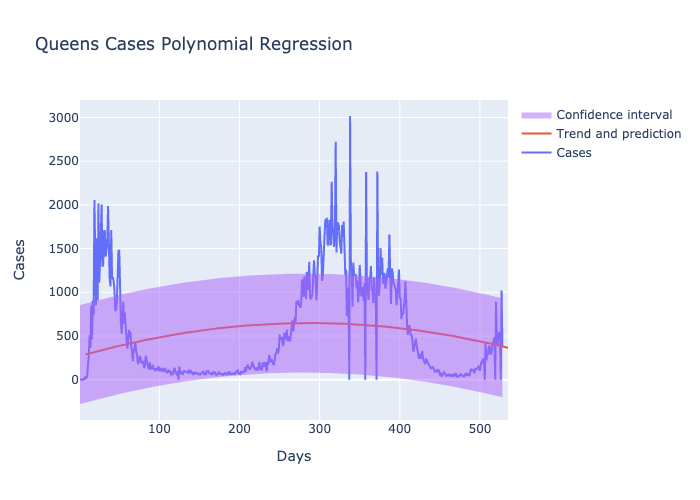

In [36]:
poly_2 = smf.ols(formula='queens_cases.cases ~ 1 + queens_cases.index + I(queens_cases.index ** 2.0)', 
                 data=queens_cases).fit()
x = pd.DataFrame({'index': np.linspace(queens_cases['cases'].min(), queens_cases['cases'].max(), 528)})

fig = go.Figure([go.Scatter(name='Cases', x=queens_cases.index, y=queens_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=queens_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=queens_cases.index, y=poly_2.predict(x)+int(queens_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=queens_cases.index, 
                            y=poly_2.predict(x)-int(queens_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Queens Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 367.

In [37]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     queens_cases.cases   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.183
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           0.000317
Time:                        09:47:18   Log-Likelihood:                -4087.7
No. Observations:                 528   AIC:                             8181.
Df Residuals:                     525   BIC:                             8194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      284.9815     73.234      3.891      0.000     141.115     428.848
queens_cases.index               2.5858      0.639      4.045      0.000       1.330       3.842
I(queens_cases.index ** 2.0)    -0.0046      0.001     -3.939      0.000      -0.007      -0.002
==============================================================================
Omnibus:                       87.936   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.329
Skew:                           1.149   Prob(JB):                     8.25e-29
Kurtosis:                       3.771   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

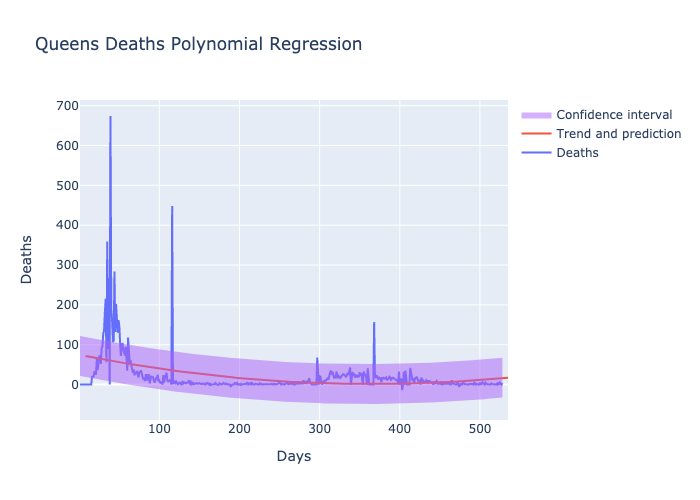

In [38]:
poly_2 = smf.ols(formula='queens_deaths.deaths ~ 1 + queens_deaths.index + I(queens_deaths.index ** 2.0)', 
                 data=queens_deaths).fit()
x = pd.DataFrame({'index': np.linspace(queens_deaths['deaths'].min(), queens_deaths['deaths'].max(), 528)})

fig = go.Figure([go.Scatter(name='Deaths', x=queens_deaths.index, y=queens_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=queens_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=queens_deaths.index, y=poly_2.predict(x)+int(queens_deaths.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=queens_deaths.index, 
                            y=poly_2.predict(x)-int(queens_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Queens Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 17.

In [39]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     queens_deaths.deaths   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.146
Method:                   Least Squares   F-statistic:                     45.96
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           4.06e-19
Time:                          09:47:18   Log-Likelihood:                -2776.8
No. Observations:                   528   AIC:                             5560.
Df Residuals:                       525   BIC:                             5572.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        72.1149      6.116     11.791      0.000      60.100      84.130
queens_deaths.index              -0.3960      0.053     -7.417      0.000      -0.501      -0.291
I(queens_deaths.index ** 2.0)     0.0006   9.77e-05      5.666      0.000       0.000       0.001
==============================================================================
Omnibus:                      718.839   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123722.717
Skew:                           6.938   Prob(JB):                         0.00
Kurtosis:                      76.697   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Suffolk County

In [40]:
suffolk_cases = ny_new_cases.loc[1912]
suffolk_cases.head(7)

1    0
2    0
3    0
4    0
5    0
6    1
7    0
Name: 1912, dtype: int64

In [41]:
suffolk_cases = pd.DataFrame(suffolk_cases.iloc[5:])
suffolk_cases = suffolk_cases.rename(columns={1912: 'cases'})
suffolk_cases.index -= 5
suffolk_cases.head()

,cases
1,1
2,0
3,0
4,5
5,14


In [42]:
suffolk_deaths = ny_new_deaths.loc[1912]
suffolk_deaths = pd.DataFrame(suffolk_deaths.iloc[5:])
suffolk_deaths = suffolk_deaths.rename(columns={1912: 'deaths'})
suffolk_deaths.index -= 5
suffolk_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

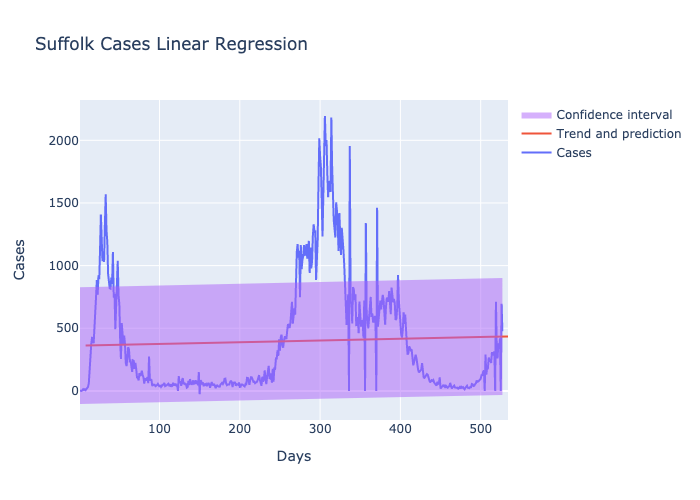

In [43]:
lm = smf.ols(formula='suffolk_cases.cases ~ suffolk_cases.index', data=suffolk_cases).fit()
x = pd.DataFrame({'index': np.linspace(suffolk_cases['cases'].min(), suffolk_cases['cases'].max(), 527)})

fig = go.Figure([go.Scatter(name='Cases', x=suffolk_cases.index, y=suffolk_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=suffolk_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=suffolk_cases.index, y=lm.predict(x)+int(suffolk_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=suffolk_cases.index, 
                            y=lm.predict(x)-int(suffolk_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Suffolk Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 434.

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     suffolk_cases.cases   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.069
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):              0.302
Time:                         09:47:18   Log-Likelihood:                -3985.4
No. Observations:                  527   AIC:                             7975.
Df Residuals:                      525   BIC:                             7983.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             361.2790     40.708      8.875      0.000     281.308     441.250
suffolk_cases.index     0.1381      0.134      1.034      0.302      -0.124       0.401
==============================================================================
Omnibus:                      133.296   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.488
Skew:                           1.469   Prob(JB):                     1.81e-54
Kurtosis:                       4.623   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

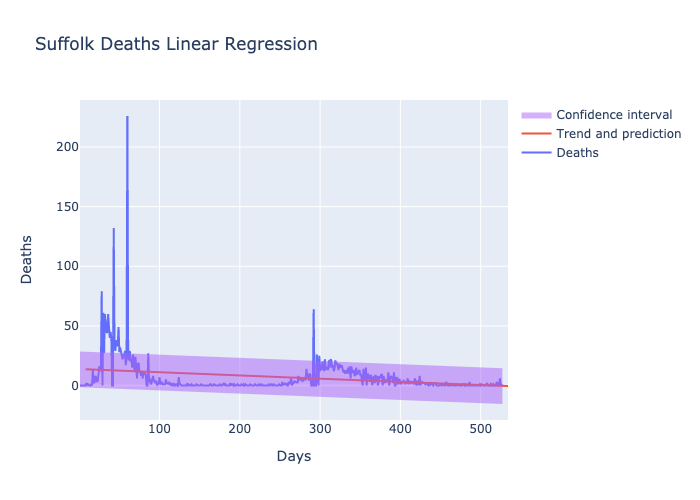

In [45]:
lm = smf.ols(formula='suffolk_deaths.deaths ~ suffolk_deaths.index', data=suffolk_deaths).fit()
x = pd.DataFrame({'index': np.linspace(suffolk_deaths['deaths'].min(), suffolk_deaths['deaths'].max(), 527)})

fig = go.Figure([go.Scatter(name='Deaths', x=suffolk_deaths.index, y=suffolk_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=suffolk_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=suffolk_deaths.index, y=lm.predict(x)+int(suffolk_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=suffolk_deaths.index, 
                            y=lm.predict(x)-int(suffolk_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Suffolk Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach 0.

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     suffolk_deaths.deaths   R-squared:                       0.072
Model:                               OLS   Adj. R-squared:                  0.070
Method:                    Least Squares   F-statistic:                     40.50
Date:                   Wed, 13 Apr 2022   Prob (F-statistic):           4.30e-10
Time:                           09:47:18   Log-Likelihood:                -2161.6
No. Observations:                    527   AIC:                             4327.
Df Residuals:                        525   BIC:                             4336.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.5499      1.278     10.599      0.000      11.038      16.061
suffolk_deaths.index    -0.0267      0.004     -6.364      0.000      -0.035      -0.018
==============================================================================
Omnibus:                      765.936   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203505.116
Skew:                           7.666   Prob(JB):                         0.00
Kurtosis:                      98.041   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

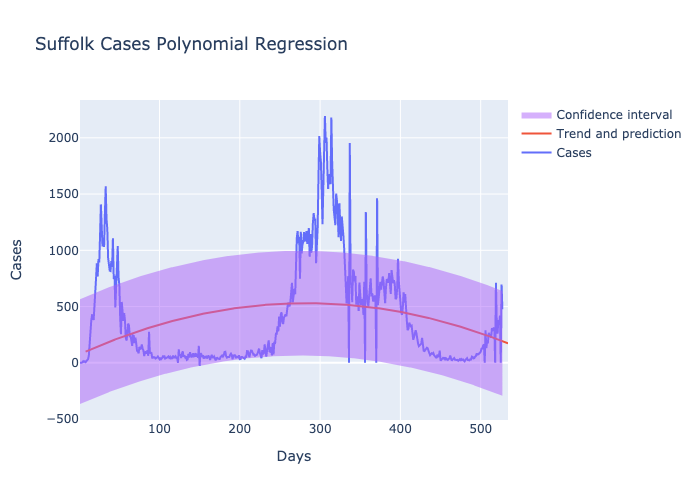

In [47]:
poly_2 = smf.ols(formula='suffolk_cases.cases ~ 1 + suffolk_cases.index + I(suffolk_cases.index ** 2.0)', 
                 data=suffolk_cases).fit()
x = pd.DataFrame({'index': np.linspace(suffolk_cases['cases'].min(), suffolk_cases['cases'].max(), 527)})

fig = go.Figure([go.Scatter(name='Cases', x=suffolk_cases.index, y=suffolk_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=suffolk_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=suffolk_cases.index, y=poly_2.predict(x)+int(suffolk_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=suffolk_cases.index, 
                            y=poly_2.predict(x)-int(suffolk_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Suffolk Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 175.

In [48]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     suffolk_cases.cases   R-squared:                       0.066
Model:                             OLS   Adj. R-squared:                  0.062
Method:                  Least Squares   F-statistic:                     18.45
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):           1.80e-08
Time:                         09:47:19   Log-Likelihood:                -3968.0
No. Observations:                  527   AIC:                             7942.
Df Residuals:                      524   BIC:                             7955.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        96.5367     59.277      1.629      0.104     -19.912     212.986
suffolk_cases.index               3.1409      0.518      6.058      0.000       2.122       4.159
I(suffolk_cases.index ** 2.0)    -0.0057      0.001     -5.981      0.000      -0.008      -0.004
==============================================================================
Omnibus:                      113.680   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.535
Skew:                           1.330   Prob(JB):                     4.23e-42
Kurtosis:                       4.264   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

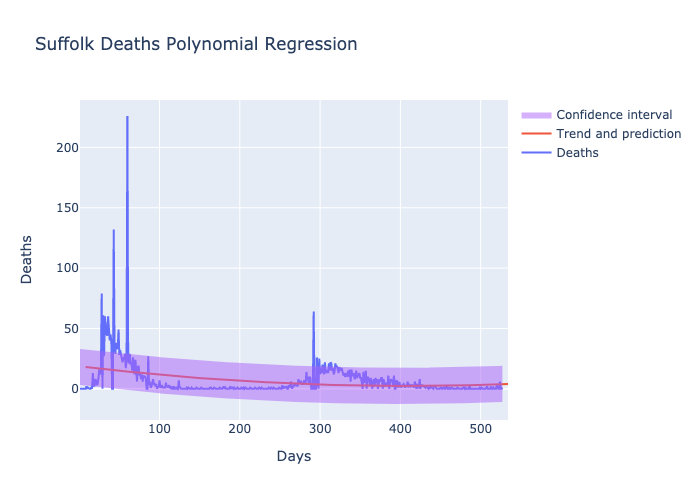

In [49]:
poly_2 = smf.ols(formula='suffolk_deaths.deaths ~ 1 + suffolk_deaths.index + I(suffolk_deaths.index ** 2.0)', 
                 data=suffolk_deaths).fit()
x = pd.DataFrame({'index': np.linspace(suffolk_deaths['deaths'].min(), suffolk_deaths['deaths'].max(), 527)})

fig = go.Figure([go.Scatter(name='Deaths', x=suffolk_deaths.index, y=suffolk_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=suffolk_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=suffolk_deaths.index, y=poly_2.predict(x)+int(suffolk_deaths.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=suffolk_deaths.index, 
                            y=poly_2.predict(x)-int(suffolk_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Suffolk Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 4.

In [50]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     suffolk_deaths.deaths   R-squared:                       0.090
Model:                               OLS   Adj. R-squared:                  0.086
Method:                    Least Squares   F-statistic:                     25.85
Date:                   Wed, 13 Apr 2022   Prob (F-statistic):           1.96e-11
Time:                           09:47:19   Log-Likelihood:                -2156.4
No. Observations:                    527   AIC:                             4319.
Df Residuals:                        524   BIC:                             4332.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         18.1548      1.905      9.530      0.000      14.412      21.897
suffolk_deaths.index              -0.0789      0.017     -4.737      0.000      -0.112      -0.046
I(suffolk_deaths.index ** 2.0)  9.892e-05   3.06e-05      3.237      0.001    3.89e-05       0.000
==============================================================================
Omnibus:                      761.670   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202886.336
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                      97.921   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Nassau County

In [51]:
nassau_cases = ny_new_cases.loc[1890]
nassau_cases.head()

1    0
2    0
3    1
4    0
5    3
Name: 1890, dtype: int64

In [52]:
nassau_cases = pd.DataFrame(nassau_cases.iloc[2:])
nassau_cases = nassau_cases.rename(columns={1890: 'cases'})
nassau_cases.index -= 2
nassau_cases.head()

,cases
1,1
2,0
3,3
4,1
5,14


In [53]:
nassau_deaths = ny_new_deaths.loc[1890]
nassau_deaths = pd.DataFrame(nassau_deaths.iloc[2:])
nassau_deaths = nassau_deaths.rename(columns={1890: 'deaths'})
nassau_deaths.index -= 2
nassau_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

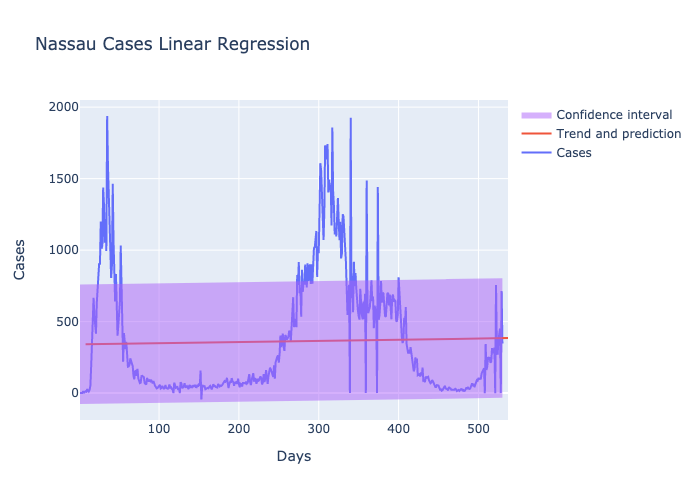

In [54]:
lm = smf.ols(formula='nassau_cases.cases ~ nassau_cases.index', data=nassau_cases).fit()
x = pd.DataFrame({'index': np.linspace(nassau_cases['cases'].min(), nassau_cases['cases'].max(), 530)})

fig = go.Figure([go.Scatter(name='Cases', x=nassau_cases.index, y=nassau_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=nassau_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=nassau_cases.index, y=lm.predict(x)+int(nassau_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=nassau_cases.index, 
                            y=lm.predict(x)-int(nassau_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Nassau Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 385.

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nassau_cases.cases   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4673
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.495
Time:                        09:47:19   Log-Likelihood:                -3950.8
No. Observations:                 530   AIC:                             7906.
Df Residuals:                     528   BIC:                             7914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            341.8211     36.430      9.383      0.000     270.256     413.386
nassau_cases.index     0.0813      0.119      0.684      0.495      -0.152       0.315
==============================================================================
Omnibus:                      123.313   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.061
Skew:                           1.406   Prob(JB):                     2.00e-47
Kurtosis:                       4.354   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

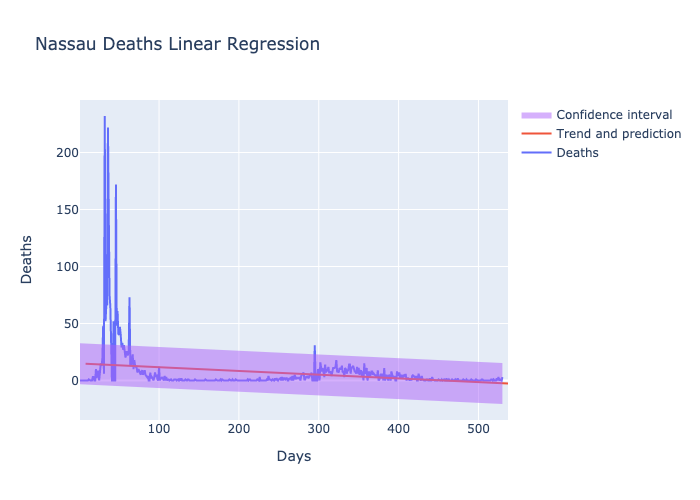

In [56]:
lm = smf.ols(formula='nassau_deaths.deaths ~ nassau_deaths.index', data=nassau_deaths).fit()
x = pd.DataFrame({'index': np.linspace(nassau_deaths['deaths'].min(), nassau_deaths['deaths'].max(), 530)})

fig = go.Figure([go.Scatter(name='Deaths', x=nassau_deaths.index, y=nassau_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=nassau_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=nassau_deaths.index, y=lm.predict(x)+int(nassau_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=nassau_deaths.index, 
                            y=lm.predict(x)-int(nassau_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Nassau Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach 0.

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     nassau_deaths.deaths   R-squared:                       0.070
Model:                              OLS   Adj. R-squared:                  0.068
Method:                   Least Squares   F-statistic:                     39.47
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           6.97e-10
Time:                          09:47:19   Log-Likelihood:                -2290.8
No. Observations:                   530   AIC:                             4586.
Df Residuals:                       528   BIC:                             4594.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              14.6810      1.589      9.238      0.000      11.559      17.803
nassau_deaths.index    -0.0326      0.005     -6.283      0.000      -0.043      -0.022
==============================================================================
Omnibus:                      772.758   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150984.347
Skew:                           7.891   Prob(JB):                         0.00
Kurtosis:                      84.166   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

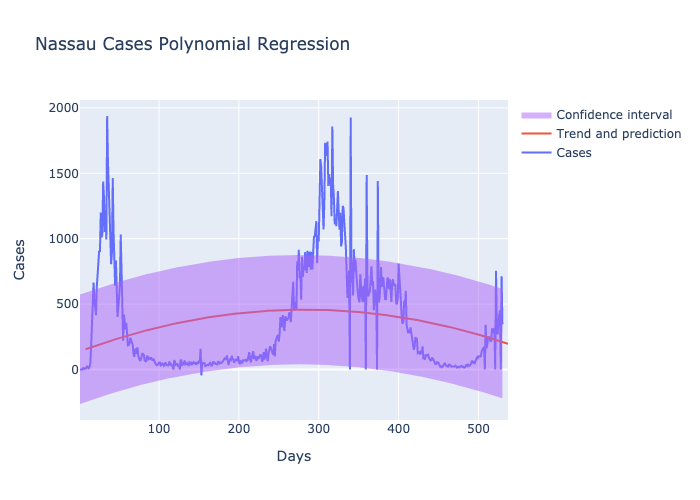

In [58]:
poly_2 = smf.ols(formula='nassau_cases.cases ~ 1 + nassau_cases.index + I(nassau_cases.index ** 2.0)', 
                 data=nassau_cases).fit()
x = pd.DataFrame({'index': np.linspace(nassau_cases['cases'].min(), nassau_cases['cases'].max(), 530)})

fig = go.Figure([go.Scatter(name='Cases', x=nassau_cases.index, y=nassau_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=nassau_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=nassau_cases.index, y=poly_2.predict(x)+int(nassau_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=nassau_cases.index, 
                            y=poly_2.predict(x)-int(nassau_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Nassau Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 200.

In [59]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nassau_cases.cases   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.36
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.47e-05
Time:                        09:47:19   Log-Likelihood:                -3939.8
No. Observations:                 530   AIC:                             7886.
Df Residuals:                     527   BIC:                             7898.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      152.6862     53.704      2.843      0.005      47.186     258.186
nassau_cases.index               2.2144      0.467      4.741      0.000       1.297       3.132
I(nassau_cases.index ** 2.0)    -0.0040      0.001     -4.716      0.000      -0.006      -0.002
==============================================================================
Omnibus:                      124.105   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.650
Skew:                           1.394   Prob(JB):                     2.01e-48
Kurtosis:                       4.473   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

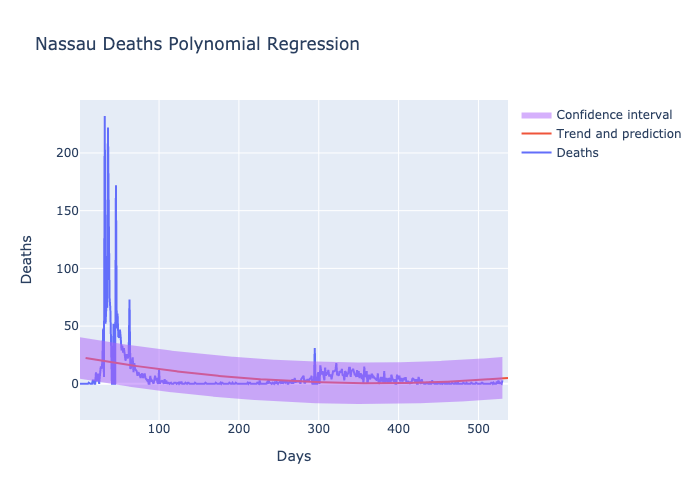

In [60]:
poly_2 = smf.ols(formula='nassau_deaths.deaths ~ 1 + nassau_deaths.index + I(nassau_deaths.index ** 2.0)', 
                 data=nassau_deaths).fit()
x = pd.DataFrame({'index': np.linspace(nassau_deaths['deaths'].min(), nassau_deaths['deaths'].max(), 530)})

fig = go.Figure([go.Scatter(name='Deaths', x=nassau_deaths.index, y=nassau_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=nassau_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=nassau_deaths.index, y=poly_2.predict(x)+int(nassau_deaths.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=nassau_deaths.index, 
                            y=poly_2.predict(x)-int(nassau_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Nassau Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 5.

In [61]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     nassau_deaths.deaths   R-squared:                       0.104
Model:                              OLS   Adj. R-squared:                  0.100
Method:                   Least Squares   F-statistic:                     30.43
Date:                  Wed, 13 Apr 2022   Prob (F-statistic):           3.11e-13
Time:                          09:47:20   Log-Likelihood:                -2280.9
No. Observations:                   530   AIC:                             4568.
Df Residuals:                       527   BIC:                             4581.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        22.5158      2.348      9.591      0.000      17.904      27.128
nassau_deaths.index              -0.1209      0.020     -5.923      0.000      -0.161      -0.081
I(nassau_deaths.index ** 2.0)     0.0002   3.72e-05      4.469      0.000    9.33e-05       0.000
==============================================================================
Omnibus:                      759.139   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143041.937
Skew:                           7.632   Prob(JB):                         0.00
Kurtosis:                      82.021   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bronx County

In [62]:
bronx_cases = ny_new_cases.loc[1863]
bronx_cases.head(7)

1    0
2    0
3    0
4    0
5    0
6    1
7    1
Name: 1863, dtype: int64

In [63]:
bronx_cases = pd.DataFrame(bronx_cases.iloc[5:])
bronx_cases = bronx_cases.rename(columns={1863: 'cases'})
bronx_cases.index -= 5
bronx_cases.head()

,cases
1,1
2,1
3,1
4,0
5,7


In [64]:
bronx_deaths = ny_new_deaths.loc[1863]
bronx_deaths = pd.DataFrame(bronx_deaths.iloc[5:])
bronx_deaths = bronx_deaths.rename(columns={1863: 'deaths'})
bronx_deaths.index -= 5
bronx_deaths.head()

,deaths
1,0
2,0
3,0
4,0
5,0


### Linear Regression

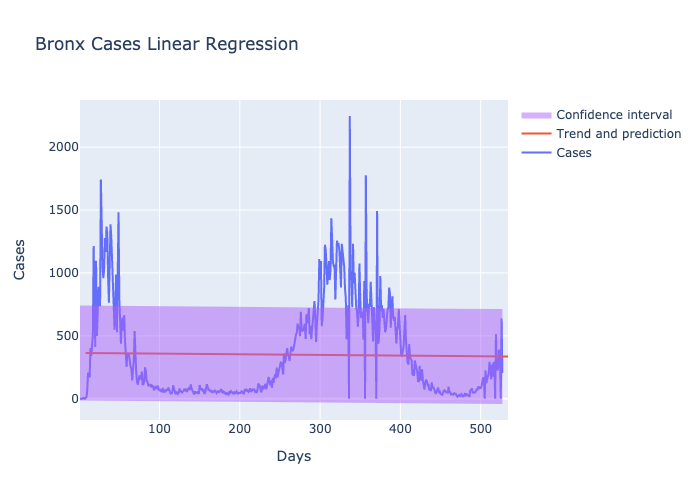

In [65]:
lm = smf.ols(formula='bronx_cases.cases ~ bronx_cases.index', data=bronx_cases).fit()
x = pd.DataFrame({'index': np.linspace(bronx_cases['cases'].min(), bronx_cases['cases'].max(), 527)})

fig = go.Figure([go.Scatter(name='Cases', x=bronx_cases.index, y=bronx_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=bronx_cases.index+7, y=lm.predict(x)),
                 go.Scatter(x=bronx_cases.index, y=lm.predict(x)+int(bronx_cases.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=bronx_cases.index, 
                            y=lm.predict(x)-int(bronx_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Bronx Cases Linear Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 336.

In [66]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bronx_cases.cases   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2438
Date:                Wed, 13 Apr 2022   Prob (F-statistic):              0.622
Time:                        09:47:20   Log-Likelihood:                -3873.6
No. Observations:                 527   AIC:                             7751.
Df Residuals:                     525   BIC:                             7760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           363.6055     32.928     11.043      0.000     298.920     428.291
bronx_cases.index    -0.0534      0.108     -0.494      0.622      -0.266       0.159
==============================================================================
Omnibus:                      119.529   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.356
Skew:                           1.347   Prob(JB):                     2.10e-46
Kurtosis:                       4.525   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

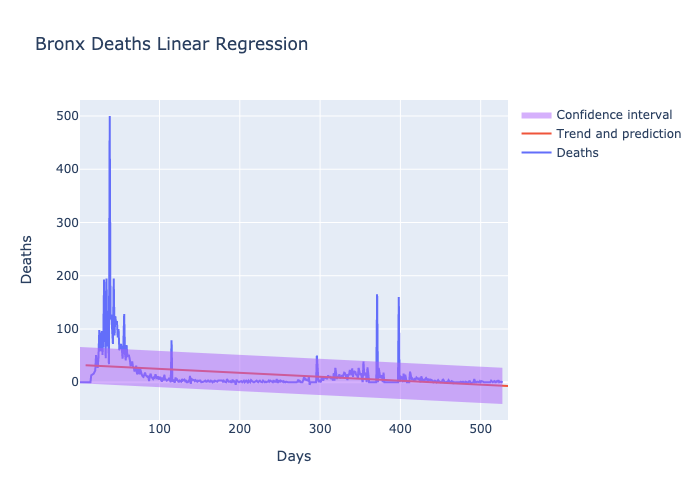

In [67]:
lm = smf.ols(formula='bronx_deaths.deaths ~ bronx_deaths.index', data=bronx_deaths).fit()
x = pd.DataFrame({'index': np.linspace(bronx_deaths['deaths'].min(), bronx_deaths['deaths'].max(), 527)})

fig = go.Figure([go.Scatter(name='Deaths', x=bronx_deaths.index, y=bronx_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=bronx_deaths.index+7, y=lm.predict(x)),
                 go.Scatter(x=bronx_deaths.index, y=lm.predict(x)+int(bronx_deaths.std()), line=dict(width=0), 
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=bronx_deaths.index, 
                            y=lm.predict(x)-int(bronx_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Bronx Deaths Linear Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach 0.

In [68]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     bronx_deaths.deaths   R-squared:                       0.109
Model:                             OLS   Adj. R-squared:                  0.107
Method:                  Least Squares   F-statistic:                     64.22
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):           7.26e-15
Time:                         09:47:20   Log-Likelihood:                -2576.3
No. Observations:                  527   AIC:                             5157.
Df Residuals:                      525   BIC:                             5165.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.0201      2.808     11.402      0.000      26.503      37.537
bronx_deaths.index    -0.0739      0.009     -8.014      0.000      -0.092      -0.056
==============================================================================
Omnibus:                      759.953   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190422.974
Skew:                           7.575   Prob(JB):                         0.00
Kurtosis:                      94.883   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regession

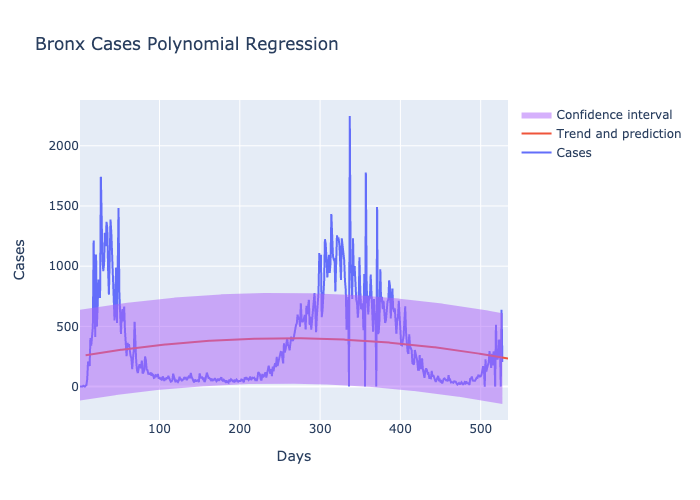

In [69]:
poly_2 = smf.ols(formula='bronx_cases.cases ~ 1 + bronx_cases.index + I(bronx_cases.index ** 2.0)', 
                 data=bronx_cases).fit()
x = pd.DataFrame({'index': np.linspace(bronx_cases['cases'].min(), bronx_cases['cases'].max(), 527)})

fig = go.Figure([go.Scatter(name='Cases', x=bronx_cases.index, y=bronx_cases['cases']),
                 go.Scatter(name='Trend and prediction', x=bronx_cases.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=bronx_cases.index, y=poly_2.predict(x)+int(bronx_cases.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=bronx_cases.index, 
                            y=poly_2.predict(x)-int(bronx_cases.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Bronx Cases Polynomial Regression', xaxis_title='Days', yaxis_title='Cases')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of cases will reach about 234.

In [70]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bronx_cases.cases   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.139
Date:                Wed, 13 Apr 2022   Prob (F-statistic):             0.0165
Time:                        09:47:20   Log-Likelihood:                -3869.6
No. Observations:                 527   AIC:                             7745.
Df Residuals:                     524   BIC:                             7758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     259.5267     49.181      5.277      0.000     162.911     356.142
bronx_cases.index               1.1271      0.430      2.620      0.009       0.282       1.972
I(bronx_cases.index ** 2.0)    -0.0022      0.001     -2.834      0.005      -0.004      -0.001
==============================================================================
Omnibus:                      122.801   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.155
Skew:                           1.359   Prob(JB):                     5.75e-49
Kurtosis:                       4.652   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

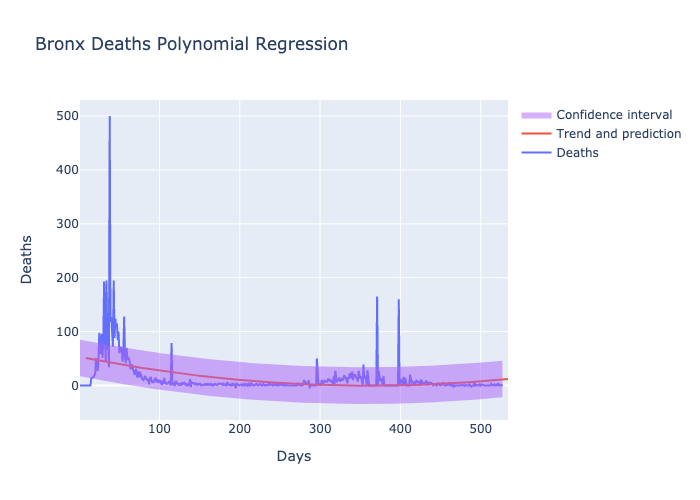

In [71]:
poly_2 = smf.ols(formula='bronx_deaths.deaths ~ 1 + bronx_deaths.index + I(bronx_deaths.index ** 2.0)', 
                 data=bronx_deaths).fit()
x = pd.DataFrame({'index': np.linspace(bronx_deaths['deaths'].min(), bronx_deaths['deaths'].max(), 527)})

fig = go.Figure([go.Scatter(name='Deaths', x=bronx_deaths.index, y=bronx_deaths['deaths']),
                 go.Scatter(name='Trend and prediction', x=bronx_deaths.index+7, y=poly_2.predict(x)),
                 go.Scatter(x=bronx_deaths.index, y=poly_2.predict(x)+int(bronx_deaths.std()), line=dict(width=0),
                            showlegend=False),
                 go.Scatter(name='Confidence interval', x=bronx_deaths.index, 
                            y=poly_2.predict(x)-int(bronx_deaths.std()), line=dict(width=0), fill='tonexty')
                ])  
fig.update_layout(title='Bronx Deaths Polynomial Regression', xaxis_title='Days', yaxis_title='Deaths')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The prediction path shows that the number of deaths will reach about 12.

In [72]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     bronx_deaths.deaths   R-squared:                       0.172
Model:                             OLS   Adj. R-squared:                  0.169
Method:                  Least Squares   F-statistic:                     54.50
Date:                 Wed, 13 Apr 2022   Prob (F-statistic):           3.14e-22
Time:                         09:47:21   Log-Likelihood:                -2556.9
No. Observations:                  527   AIC:                             5120.
Df Residuals:                      524   BIC:                             5133.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.2637      4.074     12.584      0.000      43.261      59.267
bronx_deaths.index              -0.2921      0.036     -8.198      0.000      -0.362      -0.222
I(bronx_deaths.index ** 2.0)     0.0004   6.53e-05      6.326      0.000       0.000       0.001
==============================================================================
Omnibus:                      763.973   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207557.942
Skew:                           7.614   Prob(JB):                         0.00
Kurtosis:                      99.023   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Hospital Data

For my hospital data, I decided to focus on the use of inpatient beds.

In [73]:
hospital.head()

,OBJECTID,X,Y,hospital_pk,collection_week,state,ccn,hospital_name,address,city,...,prevadmit_5059_susp_7d_sum,prevadmit_6069_susp_7d_sum,prevadmit_7079_susp_7d_sum,prevadmit_80p_susp_7d_sum,prevadmit_susp_unk_7d_sum,prevadmit_pedi_susp_7d_sum,prevday_totED_visits_7d_sum,prevadmit_flu_conf_7d_sum,zip_code,last_updated
1,4,-106.494180,31.769075,452193,2021/10/15 00:00:00+00,TX,452193.0,El Paso LTAC Hospital,1221 N Cotton St,El Paso,...,0,0,0,0,0,0,0,0,79902,2021/10/25 17:57:00+00
4,9,-87.683239,30.426961,010083,2022/02/04 00:00:00+00,AL,10083.0,SOUTH BALDWIN REGIONAL MEDICAL CENTER,1613 NORTH MCKENZIE STREET,FOLEY,...,-999999,5,4,4,0,0,944,0,36535,2022/02/14 20:08:00+00
5,10,-86.450948,32.463950,010108,2022/02/04 00:00:00+00,AL,10108.0,PRATTVILLE BAPTIST HOSPITAL,124 S MEMORIAL DR,PRATTVILLE,...,0,0,0,0,0,0,450,0,36067,2022/02/14 20:08:00+00
6,12,-87.889509,30.519924,010100,2022/02/04 00:00:00+00,AL,10100.0,THOMAS HOSPITAL,750 MORPHY AVENUE,FAIRHOPE,...,0,0,0,0,0,0,872,0,36532,2022/02/14 20:08:00+00
7,13,-87.784940,30.905870,010129,2022/02/04 00:00:00+00,AL,10129.0,NORTH BALDWIN INFIRMARY,1815 HAND AVENUE,BAY MINETTE,...,0,0,0,0,0,0,263,0,36507,2022/02/14 20:08:00+00


Using the most recent week to analyze the states

In [74]:
hospital = hospital.replace(-999999, 0)
hospital = hospital.drop(hospital.index[hospital['total_beds_7_day_avg'] == 0.0])
hospital_week = hospital.loc[hospital['collection_week'] == '2022/02/04 00:00:00+00']
hospital_states = hospital_week.groupby(by='state').sum()
hospital_states.head()

,OBJECTID,X,Y,ccn,fips_code,is_metro_micro,total_beds_7_day_avg,a_adult_hospbeds_7d_avg,a_adult_hospinpbeds_7d_avg,inpatient_beds_used_7_day_avg,...,prevadmit_4049_susp_7d_sum,prevadmit_5059_susp_7d_sum,prevadmit_6069_susp_7d_sum,prevadmit_7079_susp_7d_sum,prevadmit_80p_susp_7d_sum,prevadmit_susp_unk_7d_sum,prevadmit_pedi_susp_7d_sum,prevday_totED_visits_7d_sum,prevadmit_flu_conf_7d_sum,zip_code
state,,,,,,,,,,,,,,,,,,,,,
AK,795,-1025.261817,417.330869,146545.0,14870,3,615.2,539.5,518.8,492.0,...,0,0,0,0,0,0,0,2077,0,697456
AL,5487,-8246.899875,3115.058413,985755.0,101473,72,15121.6,14135.6,12525.3,10690.9,...,55,61,114,98,88,0,110,39054,0,3417015
AR,8222,-3237.286614,1228.318943,1393086.0,177591,22,2211.2,2082.4,2212.0,1516.3,...,0,0,4,0,5,0,7,6199,0,2529332
AZ,5195,-3800.749052,1135.201537,1047377.0,136455,32,4982.2,4351.8,3675.3,3598.1,...,4,13,25,24,18,0,8,18624,4,2905754
CA,149288,-39469.543070,11837.311186,16658568.0,1998180,315,64330.8,58915.7,53654.7,47172.5,...,156,320,462,405,629,0,86,237925,9,30756433


Represents the total capacities

In [75]:
hospital_total = hospital_states.loc[:, 'total_beds_7_day_avg']
hospital_total.head()

state
AK      615.2
AL    15121.6
AR     2211.2
AZ     4982.2
CA    64330.8
Name: total_beds_7_day_avg, dtype: float64

Represents the beds in use

In [76]:
hospital_occupied = hospital_states.loc[:, 'inpatient_beds_used_7_day_avg']
hospital_occupied.head()

state
AK      492.0
AL    10690.9
AR     1516.3
AZ     3598.1
CA    47172.5
Name: inpatient_beds_used_7_day_avg, dtype: float64

Calculating the percentage occupancy / capacity

In [77]:
hospital_percentage = hospital_occupied / hospital_total
hospital_percentage.sort_values(ascending=False).head()

state
LA    1.004110
AK    0.799740
DC    0.760434
FL    0.745495
GA    0.733881
dtype: float64

### Louisiana

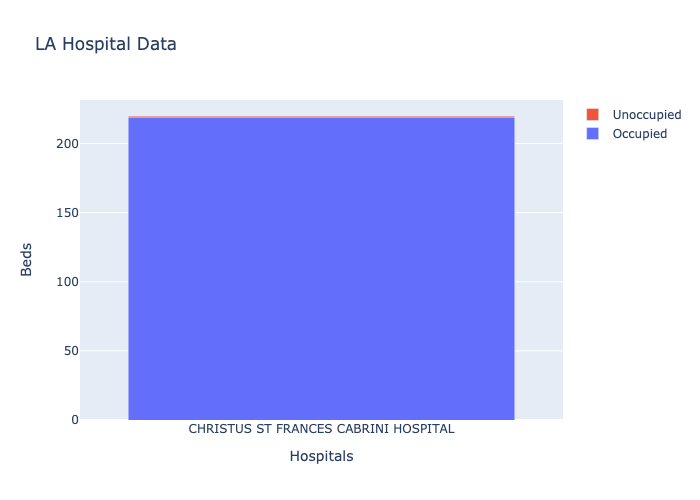

In [78]:
la = hospital.loc[hospital['state'] == 'LA']
fig = go.Figure(data=[go.Bar(name='Occupied', x=la['hospital_name'], y=la['inpatient_beds_used_7_day_avg']),
                      go.Bar(name='Unoccupied', x=la['hospital_name'], 
                             y=la['total_beds_7_day_avg'] - la['inpatient_beds_used_7_day_avg'])
])
fig.update_layout(title='LA Hospital Data', xaxis_title='Hospitals', yaxis_title='Beds', barmode='stack')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Arkansas

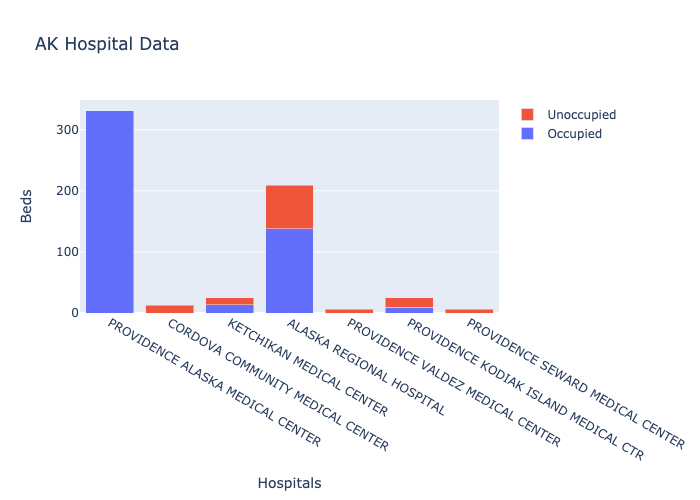

In [79]:
ak = hospital.loc[hospital['state'] == 'AK']
fig = go.Figure(data=[go.Bar(name='Occupied', x=ak['hospital_name'], y=ak['inpatient_beds_used_7_day_avg']),
                      go.Bar(name='Unoccupied', x=ak['hospital_name'], 
                             y=ak['total_beds_7_day_avg'] - ak['inpatient_beds_used_7_day_avg'])
])
fig.update_layout(title='AK Hospital Data', xaxis_title='Hospitals', yaxis_title='Beds', barmode='stack')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Washington, D.C.

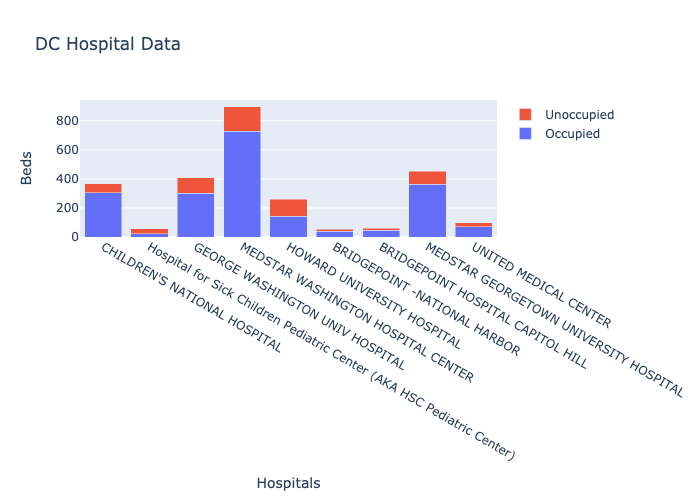

In [80]:
dc = hospital.loc[hospital['state'] == 'DC']
fig = go.Figure(data=[go.Bar(name='Occupied', x=dc['hospital_name'], y=dc['inpatient_beds_used_7_day_avg']),
                      go.Bar(name='Unoccupied', x=dc['hospital_name'], 
                             y=dc['total_beds_7_day_avg'] - dc['inpatient_beds_used_7_day_avg'])
])
fig.update_layout(title='DC Hospital Data', xaxis_title='Hospitals', yaxis_title='Beds', barmode='stack')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Florida

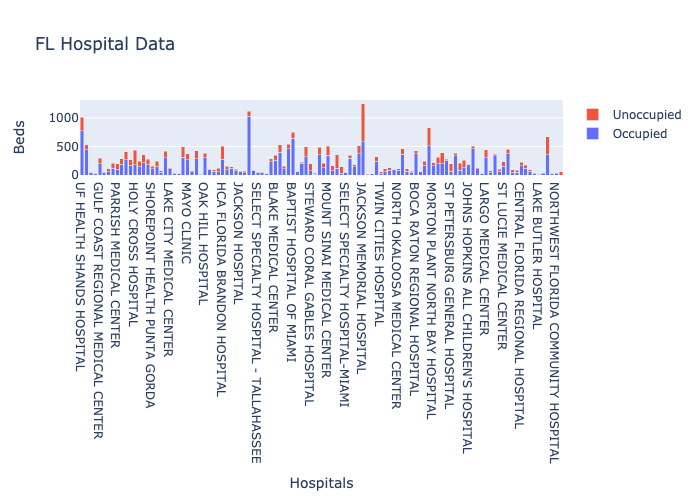

In [81]:
fl = hospital.loc[hospital['state'] == 'FL']
fig = go.Figure(data=[go.Bar(name='Occupied', x=fl['hospital_name'], y=fl['inpatient_beds_used_7_day_avg']),
                      go.Bar(name='Unoccupied', x=fl['hospital_name'], 
                             y=fl['total_beds_7_day_avg'] - fl['inpatient_beds_used_7_day_avg'])
])
fig.update_layout(title='FL Hospital Data', xaxis_title='Hospitals', yaxis_title='Beds', barmode='stack')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Georgia

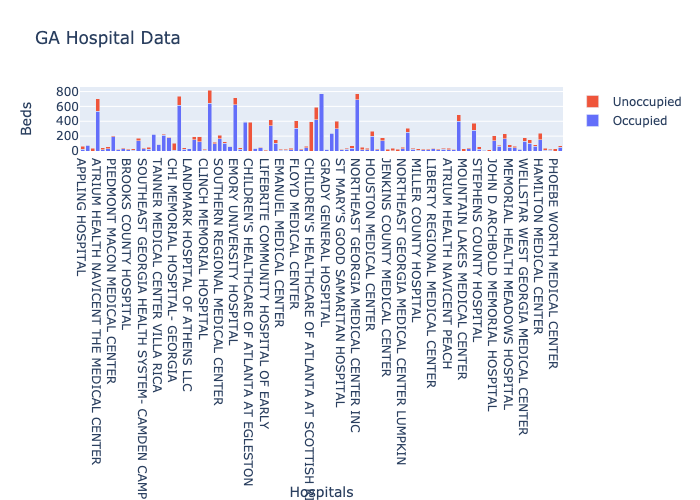

In [82]:
ga = hospital.loc[hospital['state'] == 'GA']
fig = go.Figure(data=[go.Bar(name='Occupied', x=ga['hospital_name'], y=ga['inpatient_beds_used_7_day_avg']),
                      go.Bar(name='Unoccupied', x=ga['hospital_name'], 
                             y=ga['total_beds_7_day_avg'] - ga['inpatient_beds_used_7_day_avg'])
])
fig.update_layout(title='GA Hospital Data', xaxis_title='Hospitals', yaxis_title='Beds', barmode='stack')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

## Hypothesis Tests

From stage 3, my first hypothesis was:
Do larger family sizes lead to more cases?

In [83]:
social.head()

,Label (Grouping),"Baldwin County, Alabama!!Estimate","Calhoun County, Alabama!!Estimate","Cullman County, Alabama!!Estimate","DeKalb County, Alabama!!Estimate","Elmore County, Alabama!!Estimate","Etowah County, Alabama!!Estimate","Houston County, Alabama!!Estimate","Jefferson County, Alabama!!Estimate","Lauderdale County, Alabama!!Estimate",...,"Bayamón Municipio, Puerto Rico!!Estimate","Caguas Municipio, Puerto Rico!!Estimate","Carolina Municipio, Puerto Rico!!Estimate","Guaynabo Municipio, Puerto Rico!!Estimate","Mayagüez Municipio, Puerto Rico!!Estimate","Ponce Municipio, Puerto Rico!!Estimate","San Juan Municipio, Puerto Rico!!Estimate","Toa Alta Municipio, Puerto Rico!!Estimate","Toa Baja Municipio, Puerto Rico!!Estimate","Trujillo Alto Municipio, Puerto Rico!!Estimate"
0,HOUSEHOLDS BY TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total households,"82,325","44,636","32,090","24,880","30,712","40,053","39,761","264,753","38,761",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Married-couple family,"42,253","20,571","17,070","13,623","16,257","17,587","17,794","110,529","18,344",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,With own children of the household...,"12,382","6,800","6,332","4,736","5,808","5,419","5,585","40,165","6,119",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cohabiting couple household,"4,044","2,851","1,603","1,227","1,116",549,"1,943","15,034","2,368",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
social = social.replace(np.nan, 0)
families = pd.to_numeric(social.iloc[2, 1:].replace(',','', regex=True))
families.head()

Baldwin County, Alabama!!Estimate    42253.0
Calhoun County, Alabama!!Estimate    20571.0
Cullman County, Alabama!!Estimate    17070.0
DeKalb County, Alabama!!Estimate     13623.0
Elmore County, Alabama!!Estimate     16257.0
Name: 2, dtype: float64

In [85]:
county_cases = cases.iloc[:, -1]
county_cases.head()

1     8061
2    29234
3     2761
4     3129
5     7833
Name: 2021-08-16, dtype: int64

In [86]:
stats.ttest_ind(a= families,
                b= county_cases,
                equal_var=False)

Ttest_indResult(statistic=14.163627901234065, pvalue=2.3631149316640474e-41)

Based on the p-value, we would reject the null hypothesis.

My second hypothesis was: 
Is income correlated with the rate of cases?

In [87]:
economic.head()

,Label (Grouping),"Baldwin County, Alabama!!Estimate","Calhoun County, Alabama!!Estimate","Cullman County, Alabama!!Estimate","DeKalb County, Alabama!!Estimate","Elmore County, Alabama!!Estimate","Etowah County, Alabama!!Estimate","Houston County, Alabama!!Estimate","Jefferson County, Alabama!!Estimate","Lauderdale County, Alabama!!Estimate",...,"Bayamón Municipio, Puerto Rico!!Estimate","Caguas Municipio, Puerto Rico!!Estimate","Carolina Municipio, Puerto Rico!!Estimate","Guaynabo Municipio, Puerto Rico!!Estimate","Mayagüez Municipio, Puerto Rico!!Estimate","Ponce Municipio, Puerto Rico!!Estimate","San Juan Municipio, Puerto Rico!!Estimate","Toa Alta Municipio, Puerto Rico!!Estimate","Toa Baja Municipio, Puerto Rico!!Estimate","Trujillo Alto Municipio, Puerto Rico!!Estimate"
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 16 years and over,"183,875","92,308","66,939","56,471","65,674","82,584","84,474","524,669","76,315",...,"145,194","105,777","124,812","72,389","61,564","110,723","272,665","60,968","62,625","53,984"
2,In labor force,"101,561","51,001","38,222","34,492","37,693","46,379","46,730","321,555","42,264",...,"72,288","52,224","64,313","39,552","25,459","40,717","141,804","29,602","32,095","28,834"
3,Civilian labor force,"101,561","49,395","38,222","34,150","36,372","46,379","46,402","321,190","42,203",...,"71,950","52,224","64,313","39,237","25,459","40,717","141,555","29,602","31,768","28,711"
4,Employed,"96,012","45,641","36,439","32,544","35,358","43,451","43,516","305,647","40,401",...,"65,019","47,132","56,216","35,993","19,406","36,719","116,362","28,383","27,886","27,990"


In [88]:
income = pd.to_numeric(economic.iloc[68, 1:].replace(',','', regex=True))
income.head()

Baldwin County, Alabama!!Estimate    81449
Calhoun County, Alabama!!Estimate    61137
Cullman County, Alabama!!Estimate    61920
DeKalb County, Alabama!!Estimate     56777
Elmore County, Alabama!!Estimate     82576
Name: 68, dtype: int64

In [89]:
stats.ttest_ind(a= income,
                b= county_cases,
                equal_var=False)

Ttest_indResult(statistic=69.77256349639028, pvalue=0.0)

Based on the p-value, we would reject the null hypothesis.

My third hypothesis was: Is the number of rooms in a house related to the number of cases?

In [90]:
housing.head()

,Label (Grouping),"Baldwin County, Alabama!!Estimate","Calhoun County, Alabama!!Estimate","Cullman County, Alabama!!Estimate","DeKalb County, Alabama!!Estimate","Elmore County, Alabama!!Estimate","Etowah County, Alabama!!Estimate","Houston County, Alabama!!Estimate","Jefferson County, Alabama!!Estimate","Lauderdale County, Alabama!!Estimate",...,"Bayamón Municipio, Puerto Rico!!Estimate","Caguas Municipio, Puerto Rico!!Estimate","Carolina Municipio, Puerto Rico!!Estimate","Guaynabo Municipio, Puerto Rico!!Estimate","Mayagüez Municipio, Puerto Rico!!Estimate","Ponce Municipio, Puerto Rico!!Estimate","San Juan Municipio, Puerto Rico!!Estimate","Toa Alta Municipio, Puerto Rico!!Estimate","Toa Baja Municipio, Puerto Rico!!Estimate","Trujillo Alto Municipio, Puerto Rico!!Estimate"
0,HOUSING OCCUPANCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total housing units,"119,425","53,809","38,256","31,606","34,481","47,855","48,138","309,673","45,616",...,"83,546","57,455","75,881","40,890","41,210","66,019","190,479","26,446","34,618","29,601"
2,Occupied housing units,"82,325","44,636","32,090","24,880","30,712","40,053","39,761","264,753","38,761",...,"68,980","47,669","58,602","33,125","28,649","52,837","138,800","22,650","28,291","23,263"
3,Vacant housing units,"37,100","9,173","6,166","6,726","3,769","7,802","8,377","44,920","6,855",...,"14,566","9,786","17,279","7,765","12,561","13,182","51,679","3,796","6,327","6,338"
4,Homeowner vacancy rate,3.4,1.5,2.2,0.6,1.0,1.4,1.3,1.1,1.2,...,2.5,1.5,1.9,1.6,4.8,1.4,2.3,1.4,1.4,2.0


In [91]:
rooms = housing.iloc[40, 1:]
rooms = pd.to_numeric(rooms, downcast="float")
rooms.head()

Baldwin County, Alabama!!Estimate    5.8
Calhoun County, Alabama!!Estimate    5.8
Cullman County, Alabama!!Estimate    5.7
DeKalb County, Alabama!!Estimate     5.7
Elmore County, Alabama!!Estimate     5.8
Name: 40, dtype: float32

In [92]:
stats.ttest_ind(a= rooms,
                b= county_cases,
                equal_var=False)

Ttest_indResult(statistic=-16.029624911129154, pvalue=1.2065077055013885e-55)

Based on the p-value, we would reject the null hypothesis.